## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import timedelta
import sqlite3
import prettytable
prettytable.DEFAULT='DEFAULT'
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,accuracy_score,auc,roc_curve
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Data Collection

### Loading the data into a dataframe and display first five rows

In [2]:
df=pd.read_csv("D://Unified mentor internship projects//customer_support_tickets.csv",header=0)
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


### Display information about data types of features, number of non null values in the data frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [8]:
df.shape

(8469, 17)

In [9]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

##### The dataset consists of 8469 rows and 17 columns. The columns are 'Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',  'Customer Gender',  'Product Purchased',  'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'

In [3]:
encode=LabelEncoder()
df['Gender_enc']=encode.fit_transform(df['Customer Gender'])
df['Ticket_Type_enc']=encode.fit_transform(df['Ticket Type'])
df['Ticket_Sub_enc']=encode.fit_transform(df['Ticket Subject'])
df['Ticket_Priority_enc']=encode.fit_transform(df['Ticket Priority'])
df['Ticket_Channel_enc']=encode.fit_transform(df['Ticket Channel'])
df['Product_Purchased_enc']=encode.fit_transform(df['Product Purchased'])
df['Ticket_Status_enc']=encode.fit_transform(df['Ticket Status'])
df['Resolution_enc']=encode.fit_transform(df['Resolution'])
df['Customer_Satisfaction_Rating_enc']=encode.fit_transform(df['Customer Satisfaction Rating'])
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Customer Satisfaction Rating,Gender_enc,Ticket_Type_enc,Ticket_Sub_enc,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,NaN,2,4,13,0,3,16,2,2769,5
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,NaN,0,4,10,0,0,21,2,2769,5
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,3.0,2,4,8,2,3,10,0,343,2
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,3.0,0,0,0,2,3,25,0,2549,2
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,1.0,0,0,3,2,1,5,0,2657,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   Ticket_ID                        2769 non-null   int64          
 1   Customer_Name                    2769 non-null   object         
 2   Email                            2769 non-null   object         
 3   Age                              2769 non-null   int64          
 4   Gender                           2769 non-null   object         
 5   Product_Purchased                2769 non-null   object         
 6   DateOfPurchase                   2769 non-null   object         
 7   Ticket_Type                      2769 non-null   object         
 8   Ticket_Subject                   2769 non-null   object         
 9   Description                      2769 non-null   object         
 10  Status                           2769 non-null  

## Data Wrangling

### Check for null values and handle them

In [4]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [5]:
df['Resolution'].unique()

array([nan, 'Case maybe show recently my computer follow.',
       'Try capital clearly never color toward story.', ...,
       'Say position key appear behavior.',
       'Eight account century nature kitchen.', 'We seat culture plan.'],
      dtype=object)

### Dropping the null values

In [4]:
df['Resolution'].replace(np.nan,'Unknown',inplace=True)

In [5]:
df['First Response Time'].replace(np.nan,'Unknown',inplace=True)

In [6]:
df['Time to Resolution'].replace(np.nan,'Unknown',inplace=True)

In [7]:

df['Customer Satisfaction Rating'].replace(np.nan,0.0,inplace=True)

In [11]:
df.isnull().sum()

Ticket ID                           0
Customer Name                       0
Customer Email                      0
Customer Age                        0
Customer Gender                     0
Product Purchased                   0
Date of Purchase                    0
Ticket Type                         0
Ticket Subject                      0
Ticket Description                  0
Ticket Status                       0
Resolution                          0
Ticket Priority                     0
Ticket Channel                      0
First Response Time                 0
Time to Resolution                  0
Customer Satisfaction Rating        0
Gender_enc                          0
Ticket_Type_enc                     0
Ticket_Sub_enc                      0
Ticket_Priority_enc                 0
Ticket_Channel_enc                  0
Product_Purchased_enc               0
Ticket_Status_enc                   0
Resolution_enc                      0
Customer_Satisfaction_Rating_enc    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     2769 non-null   int64  
 1   Customer Name                 2769 non-null   object 
 2   Customer Email                2769 non-null   object 
 3   Customer Age                  2769 non-null   int64  
 4   Customer Gender               2769 non-null   object 
 5   Product Purchased             2769 non-null   object 
 6   Date of Purchase              2769 non-null   object 
 7   Ticket Type                   2769 non-null   object 
 8   Ticket Subject                2769 non-null   object 
 9   Ticket Description            2769 non-null   object 
 10  Ticket Status                 2769 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               2769 non-null   object 
 13  Ticket C

### Rename columns

In [8]:
df.rename(columns={'Ticket ID':'Ticket_ID','Customer Name':'Customer_Name','Customer Email':'Email','Customer Age':'Age','Customer Gender':'Gender','Product Purchased':'Product_Purchased','Date of Purchase':'DateOfPurchase','Ticket Type':'Ticket_Type','Ticket Subject':'Ticket_Subject','Ticket Description':'Description','Ticket Status':'Status','Ticket Priority':'Priority','Ticket Channel':'Channel','First Response Time':'FirstResponseTime','Time to Resolution':'TimeToResolution','Customer Satisfaction Rating':'Customer_Satisfaction_Rating'},inplace=True)

In [13]:
df.columns

Index(['Ticket_ID', 'Customer_Name', 'Email', 'Age', 'Gender',
       'Product_Purchased', 'DateOfPurchase', 'Ticket_Type', 'Ticket_Subject',
       'Description', 'Status', 'Resolution', 'Priority', 'Channel',
       'FirstResponseTime', 'TimeToResolution', 'Customer_Satisfaction_Rating',
       'Gender_enc', 'Ticket_Type_enc', 'Ticket_Sub_enc',
       'Ticket_Priority_enc', 'Ticket_Channel_enc', 'Product_Purchased_enc',
       'Ticket_Status_enc', 'Resolution_enc',
       'Customer_Satisfaction_Rating_enc'],
      dtype='object')

In [9]:
df.FirstResponseTime=pd.to_datetime(df.FirstResponseTime,errors='coerce')

In [10]:
df.TimeToResolution=pd.to_datetime(df.TimeToResolution,errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Ticket_ID                         8469 non-null   int64         
 1   Customer_Name                     8469 non-null   object        
 2   Email                             8469 non-null   object        
 3   Age                               8469 non-null   int64         
 4   Gender                            8469 non-null   object        
 5   Product_Purchased                 8469 non-null   object        
 6   DateOfPurchase                    8469 non-null   object        
 7   Ticket_Type                       8469 non-null   object        
 8   Ticket_Subject                    8469 non-null   object        
 9   Description                       8469 non-null   object        
 10  Status                            8469 non-null 

In [11]:
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Customer_Satisfaction_Rating,Gender_enc,Ticket_Type_enc,Ticket_Sub_enc,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,0.0,2,4,13,0,3,16,2,2769,5
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,0.0,0,4,10,0,0,21,2,2769,5
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,3.0,2,4,8,2,3,10,0,343,2
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,3.0,0,0,0,2,3,25,0,2549,2
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,1.0,0,0,3,2,1,5,0,2657,0


In [11]:
df['FirstResDate']=df['FirstResponseTime'].dt.date
df['FirstResTime']=df['FirstResponseTime'].dt.time

In [13]:
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Type_enc,Ticket_Sub_enc,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,4,13,0,3,16,2,2769,5,2023-06-01,12:15:36
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,4,10,0,0,21,2,2769,5,2023-06-01,16:45:38
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,4,8,2,3,10,0,343,2,2023-06-01,11:14:38
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,0,0,2,3,25,0,2549,2,2023-06-01,07:29:40
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,0,3,2,1,5,0,2657,0,2023-06-01,00:12:42


In [12]:
df['ResolutionDate']=df['TimeToResolution'].dt.date
df['ResolutionTime']=df['TimeToResolution'].dt.time

In [15]:
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,0,3,16,2,2769,5,2023-06-01,12:15:36,NaT,NaT
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,0,0,21,2,2769,5,2023-06-01,16:45:38,NaT,NaT
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2,3,10,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,2,3,25,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,2,1,5,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42


In [16]:
#The five aggregates of columns
df.describe(include='all')

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,...,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,5650,5650,2769,2769
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,...,NaN,NaN,NaN,NaN,NaN,NaN,3,5464,3,2726
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-01,01:21:19,2023-06-01,17:14:42
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,...,NaN,NaN,NaN,NaN,NaN,NaN,5437,3,2649,3
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,...,1.509859,1.507852,20.539733,1.013225,2316.164364,4.016295,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,10.000000,0.000000,2117.000000,3.000000,NaN,NaN,NaN,NaN
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,20.000000,1.000000,2769.000000,5.000000,NaN,NaN,NaN,NaN
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,31.000000,2.000000,2769.000000,5.000000,NaN,NaN,NaN,NaN
max,8469.000000,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,41.000000,2.000000,2769.000000,5.000000,NaN,NaN,NaN,NaN


In [22]:
df.columns

Index(['Ticket_ID', 'Customer_Name', 'Email', 'Age', 'Gender',
       'Product_Purchased', 'DateOfPurchase', 'Ticket_Type', 'Ticket_Subject',
       'Description', 'Status', 'Resolution', 'Priority', 'Channel',
       'FirstResponseTime', 'TimeToResolution', 'Customer_Satisfaction_Rating',
       'Gender_enc', 'Ticket_Type_enc', 'Ticket_Sub_enc',
       'Ticket_Priority_enc', 'Ticket_Channel_enc', 'Product_Purchased_enc',
       'Ticket_Status_enc', 'Resolution_enc',
       'Customer_Satisfaction_Rating_enc', 'FirstResDate', 'FirstResTime',
       'ResolutionDate', 'ResolutionTime'],
      dtype='object')

## Analysis with SQL

In [14]:
conn=sqlite3.connect('CustomerSatisfactionDB')

In [15]:
%load_ext sql

In [16]:
cur=conn.cursor()

In [17]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [18]:
%sql sqlite:///CustomerSatisfactionDB

In [19]:
df[['Ticket_ID', 'Customer_Name', 'Email', 'Age', 'Gender',
       'Product_Purchased', 'DateOfPurchase', 'Ticket_Type', 'Ticket_Subject',
       'Description', 'Status', 'Resolution', 'Priority', 'Channel',
       'FirstResponseTime', 'TimeToResolution', 'Customer_Satisfaction_Rating']].to_sql('Customer_Satisfaction',conn,if_exists='replace',index=False,method='multi')

8469

In [20]:
%sql create table Customer_Satisfaction as select * from Customer_Satisfaction

 * sqlite:///CustomerSatisfactionDB
(sqlite3.OperationalError) table Customer_Satisfaction already exists
[SQL: create table Customer_Satisfaction as select * from Customer_Satisfaction]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


### Ticket_ID and Customer names of most satisfied customers

In [26]:
%sql select Ticket_ID,Customer_Name from Customer_Satisfaction where Customer_Satisfaction_Rating=5.0

 * sqlite:///CustomerSatisfactionDB
Done.


Ticket_ID,Customer_Name
20,Jeffrey Robertson
29,Christine Wang
34,Timothy Lyons
59,Kimberly Mack
67,John Robertson
78,Alfred Ortiz
90,Lisa Hill
96,Linda Campbell
99,Nichole Huang
117,Sabrina Weber


### Number of customers who are most satisfied with the resolution

In [27]:
%sql select count(Ticket_ID) from Customer_Satisfaction where Customer_Satisfaction_Rating=5.0

 * sqlite:///CustomerSatisfactionDB
Done.


count(Ticket_ID)
544


### Number of different priority of issues

In [29]:
%sql select Priority,count(Priority) as 'Priority_Count' from Customer_Satisfaction group by Priority

 * sqlite:///CustomerSatisfactionDB
Done.


Priority,Priority_Count
Critical,2129
High,2085
Low,2063
Medium,2192


### Number of priority issues raised from channel Social Media

In [32]:
%sql select Priority,count(Priority) as 'Priority_Count' from Customer_Satisfaction group by Priority having channel='Social media' 

 * sqlite:///CustomerSatisfactionDB
Done.


Priority,Priority_Count
Critical,2129
Low,2063
Medium,2192


### Number of priority issues raised from channel Phone

In [35]:
%sql select Priority,count(Priority) as 'Priority_Count' from Customer_Satisfaction group by Priority having channel='Phone'

 * sqlite:///CustomerSatisfactionDB
Done.


Priority,Priority_Count
High,2085


### The ticket_id, customer name,age of customer whose age is maximum

In [38]:
%sql select Ticket_ID,Customer_Name,Ticket_Subject,Age from Customer_Satisfaction where Age=(select max(Age) from Customer_Satisfaction) 

 * sqlite:///CustomerSatisfactionDB
Done.


Ticket_ID,Customer_Name,Ticket_Subject,Age
191,Regina Castillo,Product setup,70
221,Jacqueline Weaver,Installation support,70
323,Cindy Hale,Battery life,70
351,Ryan Murillo,Product compatibility,70
485,Carrie Wise,Data loss,70
498,Darrell Cook,Software bug,70
571,Levi Valencia,Refund request,70
623,Juan Hayes,Payment issue,70
713,Dawn Jones,Product recommendation,70
722,Beth Watson,Product setup,70


### The channel type of customers whose age is minimum

In [39]:
%sql select Ticket_ID,Customer_Name,Channel,Age from Customer_Satisfaction where Age=(select min(Age) from Customer_Satisfaction)

 * sqlite:///CustomerSatisfactionDB
Done.


Ticket_ID,Customer_Name,Channel,Age
16,Elizabeth Foley,Social media,18
77,Matthew Scott,Phone,18
97,Charles Simpson,Social media,18
102,Danielle Rogers,Phone,18
118,Glenda Lopez,Phone,18
194,Tiffany Wilson,Chat,18
217,Angela Thompson,Chat,18
236,Ruth Fritz,Email,18
314,Joe Collins,Phone,18
318,Tamara Olson,Chat,18


### The number of Channel type whose age is minimum

In [40]:
%sql select Channel,count(Channel) from Customer_Satisfaction where Age=(select min(Age) from Customer_Satisfaction)

 * sqlite:///CustomerSatisfactionDB
Done.


Channel,count(Channel)
Social media,163


### Ticket subjects of different products purchased

In [32]:
%sql select Product_Purchased,Ticket_Subject from Customer_Satisfaction group by Ticket_Subject

 * sqlite:///CustomerSatisfactionDB
Done.


Product_Purchased,Ticket_Subject
Microsoft Office,Account access
Philips Hue Lights,Battery life
Lenovo ThinkPad,Cancellation request
Autodesk AutoCAD,Data loss
Xbox,Delivery problem
Amazon Kindle,Display issue
Nintendo Switch Pro Controller,Hardware issue
Fitbit Versa Smartwatch,Installation support
Dell XPS,Network problem
Microsoft Office,Payment issue


### Ticket subjects whose proirity is critical or high

In [37]:
%sql select Ticket_Subject,Priority from Customer_Satisfaction group by Ticket_Subject  having Priority in (select Priority from Customer_Satisfaction where Priority='Critical' or Priority='High')order by Priority

 * sqlite:///CustomerSatisfactionDB
Done.


Ticket_Subject,Priority
Battery life,Critical
Display issue,Critical
Peripheral compatibility,Critical
Product setup,Critical
Refund request,Critical
Product recommendation,High
Software bug,High


## Data Analysis and Visualisation

### Which ticket type is most frequently raised?-Customer Segmentation by ticket types

In [13]:
df_grp=df.groupby(['Ticket_Type'])['Ticket_Type'].count().to_frame()
df_grp.rename(columns={'Ticket_Type':'Ticket_Type_Count'},inplace=True)
df_grp.sort_values(by='Ticket_Type_Count',ascending=False,inplace=True)
df_grp

,Ticket_Type_Count
Ticket_Type,
Refund request,1752
Technical issue,1747
Cancellation request,1695
Product inquiry,1641
Billing inquiry,1634


Most frequently raised ticket type is 'Refund request'. The second most frequently raised ticket type is 'Technical issue'.

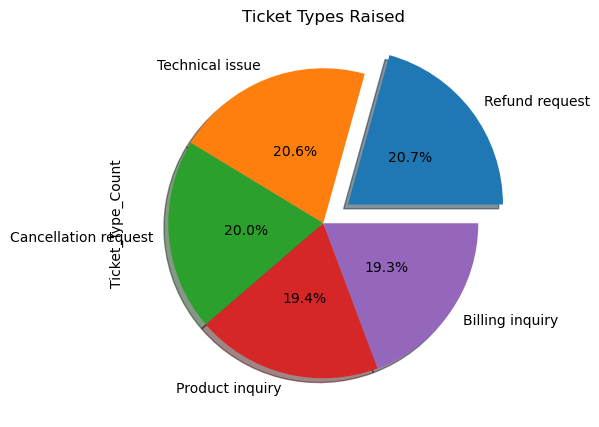

In [14]:
df_grp['Ticket_Type_Count'].plot(kind='pie',figsize=(5,6),labels=df_grp.index,autopct='%1.1f%%',shadow=True,explode=[0.2,0,0,0,0],pctdistance=0.5)
plt.title('Ticket Types Raised')
plt.show()

### What is the relationship between ticket type and priority?

In [15]:
df_grp_priority=df.groupby(['Ticket_Type','Priority'])['Priority'].count().to_frame()
df_grp_priority.rename(columns={'Priority':'Priority_Count'},inplace=True)
df_grp_priority.sort_values(by='Priority_Count',ascending=False,inplace=True)
df_grp_priority

Priority_Count
Ticket_Type          Priority                
Cancellation request Medium               460
Technical issue      High                 458
Refund request       High                 448
                     Critical             444
Product inquiry      Medium               441
Refund request       Low                  440
Technical issue      Critical             439
                     Medium               437
Billing inquiry      Medium               434
Cancellation request Critical             423
Refund request       Medium               420
Billing inquiry      Critical             420
Cancellation request Low                  414
Technical issue      Low                  413
Product inquiry      Critical             403
                     High                 399
Cancellation request High                 398
Billing inquiry      Low                  398
Product inquiry      Low                  398
Billing inquiry      High                 382

Number of cancellation requests with medium priority is greatest.  Number of billing inquiry with high priority is lowest. 

In [16]:
df_grp_priority.reset_index(inplace=True)

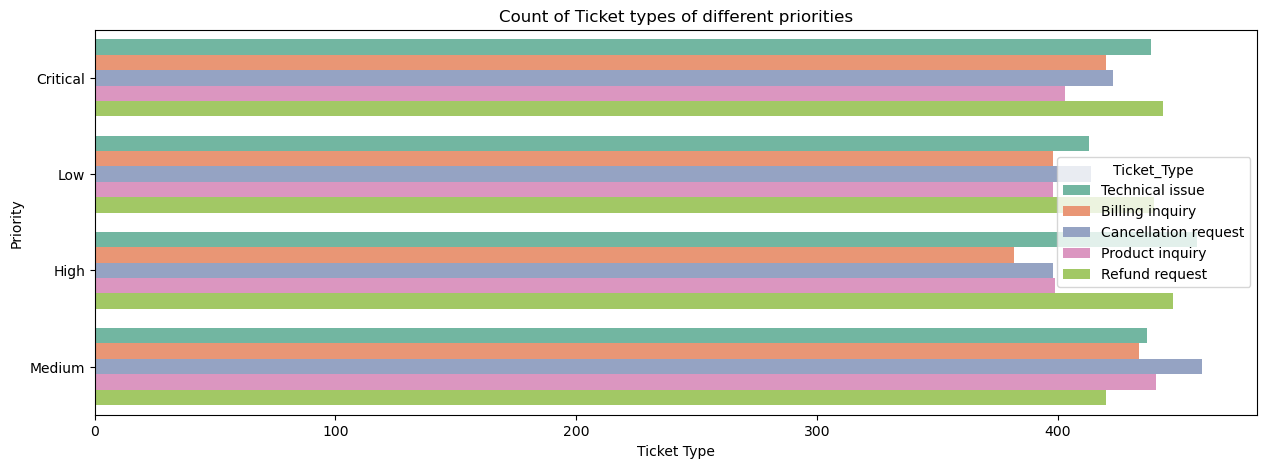

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,y='Priority',hue='Ticket_Type',palette=sns.color_palette('Set2'))
plt.title('Count of Ticket types of different priorities')
plt.xlabel('Ticket Type')
plt.ylabel('Priority')
plt.show()

### Top 10 common issues

In [18]:
df_grpcomissue=df['Ticket_Subject'].value_counts()
df_grpcomissue

Ticket_Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64

### Trends of issues over the years

In [19]:
df.reset_index(inplace=True)
df

,index,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,...,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime
0,0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,...,0,3,16,2,2769,5,2023-06-01,12:15:36,NaT,NaT
1,1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,...,0,0,21,2,2769,5,2023-06-01,16:45:38,NaT,NaT
2,2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,...,2,3,10,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38
3,3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,...,2,3,25,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40
4,4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,...,2,1,5,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,...,2,2,20,1,2769,5,NaT,NaT,NaT,NaT
8465,8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,...,0,1,7,1,2769,5,NaT,NaT,NaT,NaT
8466,8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,...,1,3,15,0,666,2,2023-06-01,09:44:22,2023-06-01,04:31:22
8467,8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,...,3,1,33,0,2644,2,2023-06-01,18:28:24,2023-06-01,05:32:24


In [20]:
df.drop(columns='index',inplace=True)
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,0,3,16,2,2769,5,2023-06-01,12:15:36,NaT,NaT
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,0,0,21,2,2769,5,2023-06-01,16:45:38,NaT,NaT
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,2,3,10,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,2,3,25,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,2,1,5,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42


In [21]:
df['YMonth']=df['FirstResponseTime'].dt.to_period('M') 
df['YMonth']



0       2023-06
1       2023-06
2       2023-06
3       2023-06
4       2023-06
         ...   
8464        NaT
8465        NaT
8466    2023-06
8467    2023-06
8468        NaT
Name: YMonth, Length: 8469, dtype: period[M]

In [22]:
df_ymonthtrend=df.groupby(['YMonth']).size()
df_ymonthtrend.head()

YMonth
2023-05     175
2023-06    5475
Freq: M, dtype: int64

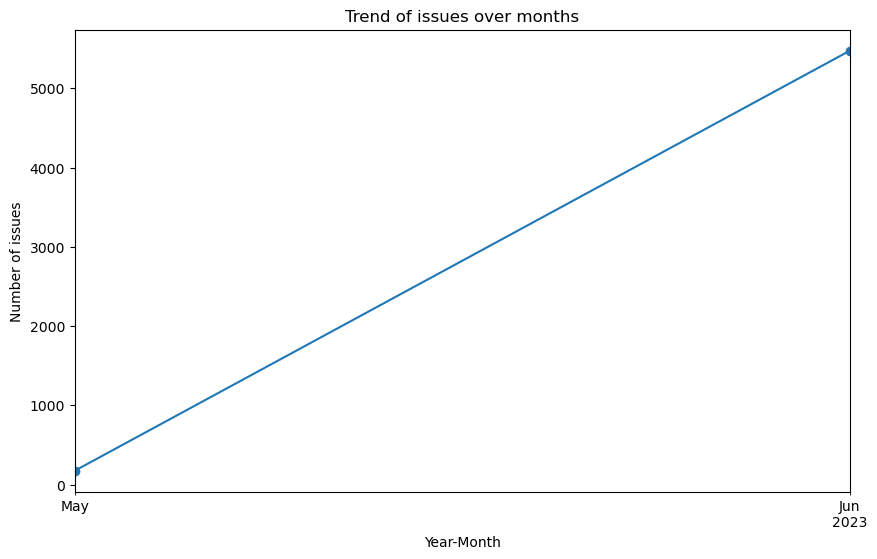

In [23]:
plt.figure(figsize=(10,6))
df_ymonthtrend.plot(kind='line',marker='o')
plt.title('Trend of issues over months')
plt.xlabel('Year-Month')
plt.ylabel('Number of issues')
plt.show()

### Duration between First Response Time and Time to resolution for each priority requests

In [24]:
datediff=abs(df['TimeToResolution']-df['FirstResponseTime'])
df['Time_to_response']=datediff
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime,YMonth,Time_to_response
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,16,2,2769,5,2023-06-01,12:15:36,NaT,NaT,2023-06,NaT
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,21,2,2769,5,2023-06-01,16:45:38,NaT,NaT,2023-06,NaT
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,10,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38,2023-06,0 days 06:51:00
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,25,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40,2023-06,0 days 05:32:00
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,5,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42,2023-06,0 days 19:41:00


In [25]:
df[['Priority','Time_to_response']]

,Priority,Time_to_response
0,Critical,NaT
1,Critical,NaT
2,Low,0 days 06:51:00
3,Low,0 days 05:32:00
4,Low,0 days 19:41:00
...,...,...
8464,Low,NaT
8465,Critical,NaT
8466,High,0 days 05:13:00
8467,Medium,0 days 12:56:00


In [26]:
ar=[float(df['Time_to_response'][x].total_seconds()) for x in range(len(df)) if df['Time_to_response'][x]!='NaT']
ar

[nan,
 nan,
 24660.0,
 19920.0,
 70860.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 64500.0,
 9480.0,
 nan,
 nan,
 26040.0,
 nan,
 13680.0,
 nan,
 nan,
 70980.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 24360.0,
 62940.0,
 nan,
 2040.0,
 nan,
 59040.0,
 nan,
 27720.0,
 nan,
 nan,
 75120.0,
 nan,
 nan,
 20520.0,
 nan,
 nan,
 9540.0,
 nan,
 20460.0,
 4620.0,
 nan,
 nan,
 nan,
 21000.0,
 68700.0,
 35160.0,
 nan,
 nan,
 nan,
 nan,
 25860.0,
 69120.0,
 41820.0,
 nan,
 47040.0,
 nan,
 nan,
 nan,
 18660.0,
 nan,
 nan,
 47160.0,
 nan,
 nan,
 4680.0,
 68820.0,
 nan,
 43980.0,
 nan,
 14100.0,
 nan,
 nan,
 nan,
 nan,
 53700.0,
 nan,
 nan,
 nan,
 42000.0,
 nan,
 nan,
 13920.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 66660.0,
 nan,
 nan,
 27600.0,
 nan,
 nan,
 nan,
 44160.0,
 nan,
 nan,
 nan,
 32880.0,
 nan,
 19200.0,
 nan,
 34140.0,
 nan,
 nan,
 18000.0,
 15780.0,
 nan,
 2700.0,
 14520.0,
 nan,
 37620.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 8220.0,
 nan,
 23280.0,
 nan,
 nan,
 66060.0,
 23580.0,
 

In [27]:
df['Time_elapsed_to_respond_seconds']=ar
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime,YMonth,Time_to_response,Time_elapsed_to_respond_seconds
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,2,2769,5,2023-06-01,12:15:36,NaT,NaT,2023-06,NaT,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,2,2769,5,2023-06-01,16:45:38,NaT,NaT,2023-06,NaT,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38,2023-06,0 days 06:51:00,24660.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40,2023-06,0 days 05:32:00,19920.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42,2023-06,0 days 19:41:00,70860.0


In [28]:
df['Time_elapsed_to_respond_seconds'].replace(np.nan,0.0,inplace=True)
df.head()

,Ticket_ID,Customer_Name,Email,Age,Gender,Product_Purchased,DateOfPurchase,Ticket_Type,Ticket_Subject,Description,...,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,FirstResDate,FirstResTime,ResolutionDate,ResolutionTime,YMonth,Time_to_response,Time_elapsed_to_respond_seconds
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,2,2769,5,2023-06-01,12:15:36,NaT,NaT,2023-06,NaT,0.0
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,2,2769,5,2023-06-01,16:45:38,NaT,NaT,2023-06,NaT,0.0
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,...,0,343,2,2023-06-01,11:14:38,2023-06-01,18:05:38,2023-06,0 days 06:51:00,24660.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,...,0,2549,2,2023-06-01,07:29:40,2023-06-01,01:57:40,2023-06,0 days 05:32:00,19920.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,...,0,2657,0,2023-06-01,00:12:42,2023-06-01,19:53:42,2023-06,0 days 19:41:00,70860.0


### Which 10 products raises issues most?

In [29]:
df_grp_product=df.groupby(['Product_Purchased'])['Ticket_Type'].count().to_frame()
df_grp_product.rename(columns={'Ticket_Type':'Ticket_Type_Count'},inplace=True)
df_grp_product.sort_values(by='Ticket_Type_Count',ascending=False,inplace=True)
df_grp_product.iloc[:10]

,Ticket_Type_Count
Product_Purchased,
Canon EOS,240
GoPro Hero,228
Nest Thermostat,225
Philips Hue Lights,221
Amazon Echo,221
LG Smart TV,219
Sony Xperia,217
Roomba Robot Vacuum,216
Apple AirPods,213


Canon EOS raised highest number of issues.

In [30]:
df_grp_product.reset_index(inplace=True)

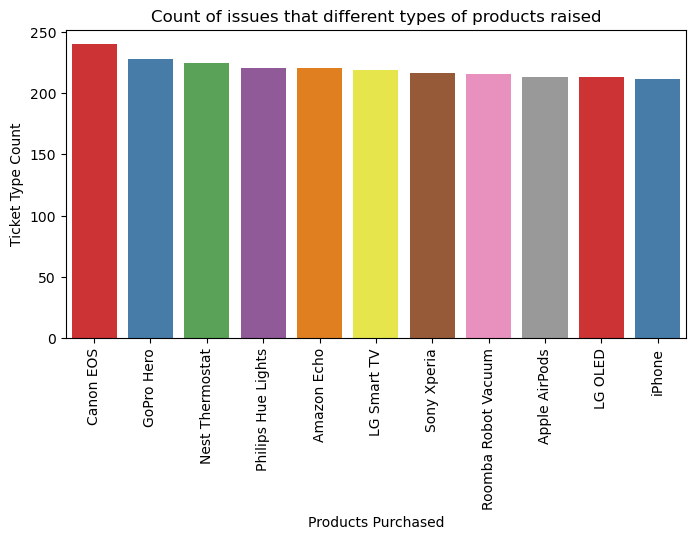

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_grp_product[:11],x='Product_Purchased',y='Ticket_Type_Count',palette=sns.color_palette('Set1'))
plt.title('Count of issues that different types of products raised')
plt.xlabel('Products Purchased')
plt.ylabel('Ticket Type Count')
plt.xticks(rotation=90)
plt.show()

### The gender that raises ticket most 

In [32]:
df_gen=df.groupby(['Gender'])['Gender'].count()
df_gen

Gender
Female    2887
Male      2896
Other     2686
Name: Gender, dtype: int64

Female raises ticket most. 

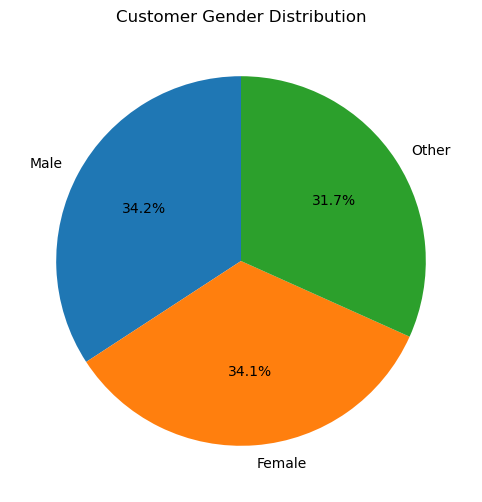

In [33]:
df_gen_count=df['Gender'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(df_gen_count,labels=df_gen_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Customer Gender Distribution')
plt.show()

### The age group that raises the ticket most

In [34]:
df_age=df.groupby(['Age'])['Age'].count().to_frame()
df_age.columns=['Age_Count']
df_age.sort_values(by='Age_Count',ascending=False,inplace=True)
df_age

,Age_Count
Age,
52,186
56,182
24,180
27,180
59,177
34,177
44,173
20,173
48,172


The people of the ages 44,34,48,52 raised tickets most.

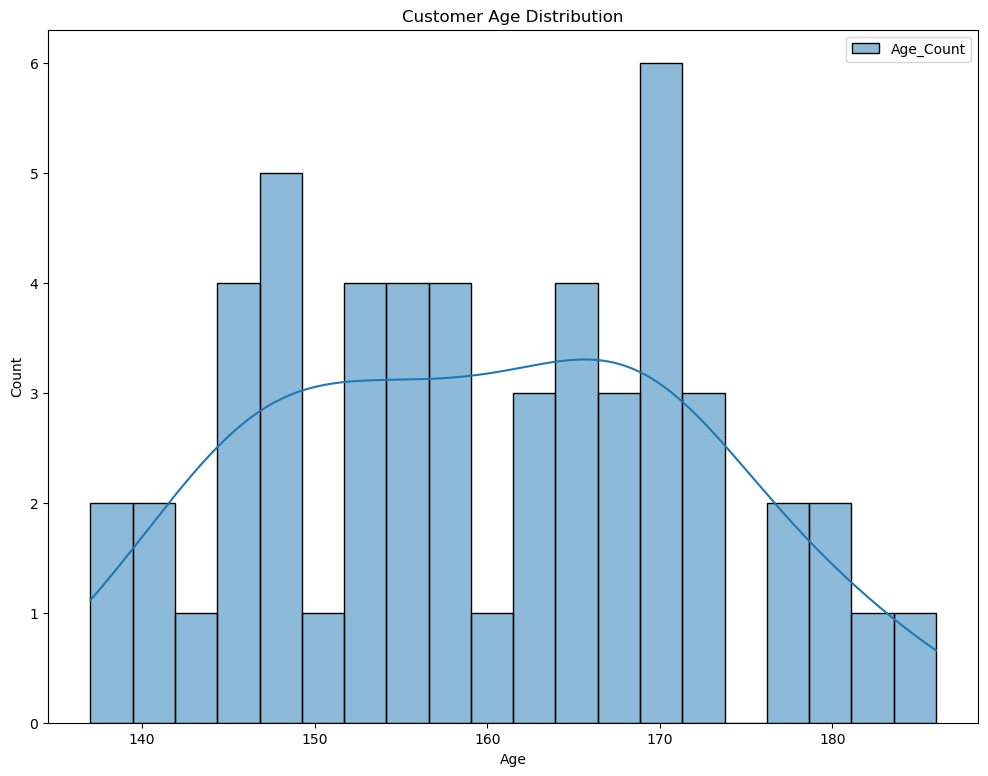

In [35]:
plt.figure(figsize=(12,9))
sns.histplot(data=df_age,bins=20,kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### What is the channel that customers use to raise the ticket most of the time?

In [36]:
df_channelgrp=df.groupby(['Channel'])['Channel'].count().to_frame()
df_channelgrp.columns=['Channel_Count']
df_channelgrp.sort_values(by='Channel_Count',ascending=False,inplace=True)
df_channelgrp

,Channel_Count
Channel,
Email,2143
Phone,2132
Social media,2121
Chat,2073


The customers use the channel Email to raise the ticket most of the time.

In [37]:
df_channelgrp.reset_index(inplace=True)

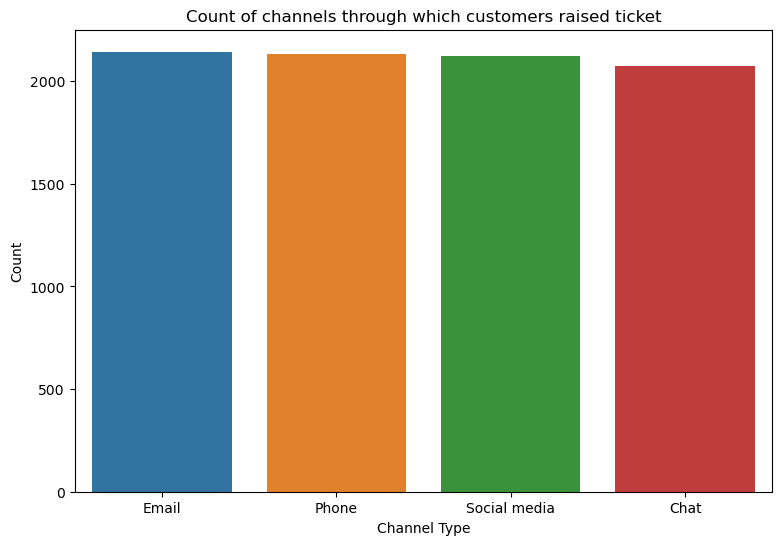

In [38]:
plt.figure(figsize=(9,6))
sns.barplot(data=df_channelgrp,x='Channel',y='Channel_Count')
plt.title('Count of channels through which customers raised ticket')
plt.xlabel('Channel Type')
plt.ylabel('Count')
plt.show()

### Distribution of ticket status

In [40]:
df_grp_st=df.groupby(['Status']).size()
df_grp_st

Status
Closed                       2769
Open                         2819
Pending Customer Response    2881
dtype: int64

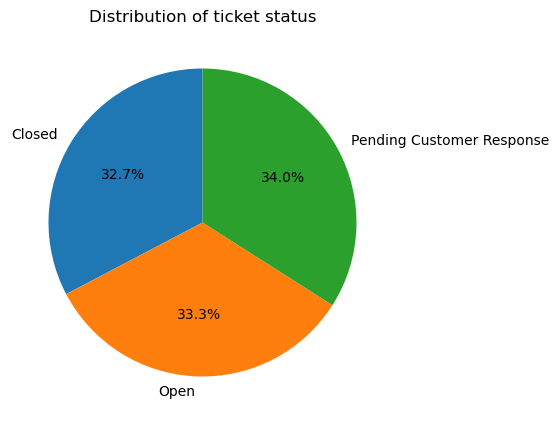

In [66]:
plt.figure(figsize=(7,5))
plt.pie(df_grp_st,labels=df_grp_st.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of ticket status')
plt.show()

### Customer Satisfaction Rating

In [43]:
customersatisfaction=df.groupby('Customer_Satisfaction_Rating').size()


In [44]:
df_cust=df[df['Customer_Satisfaction_Rating']!=0.0]
df_cust['Customer_Satisfaction_Rating'].head()

2     3.0
3     3.0
4     1.0
10    1.0
11    1.0
Name: Customer_Satisfaction_Rating, dtype: float64

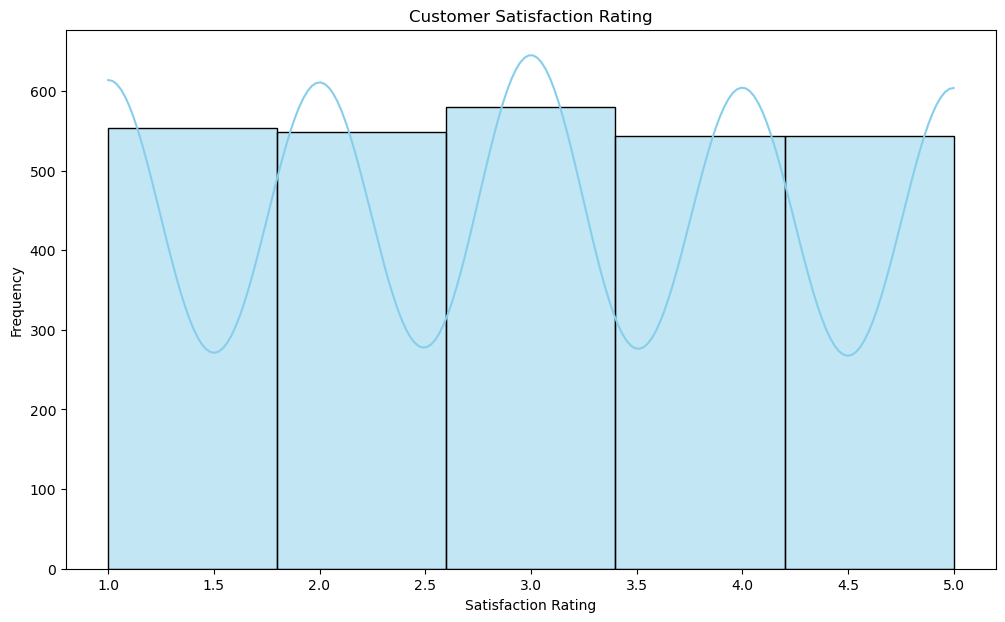

In [46]:
plt.figure(figsize=(12,7))
sns.histplot(df_cust['Customer_Satisfaction_Rating'],bins=5,kde=True,color='skyblue')
plt.title('Customer Satisfaction Rating')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

The  customer satisfaction rating of 3.0 was given by most of the customers about 580 of  them.


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   Ticket_ID                         8469 non-null   int64          
 1   Customer_Name                     8469 non-null   object         
 2   Email                             8469 non-null   object         
 3   Age                               8469 non-null   int64          
 4   Gender                            8469 non-null   object         
 5   Product_Purchased                 8469 non-null   object         
 6   DateOfPurchase                    8469 non-null   object         
 7   Ticket_Type                       8469 non-null   object         
 8   Ticket_Subject                    8469 non-null   object         
 9   Description                       8469 non-null   object         
 10  Status                            84

In [47]:
df1=df.select_dtypes(['int32','int64','float64'])
df1

,Ticket_ID,Age,Customer_Satisfaction_Rating,Gender_enc,Ticket_Type_enc,Ticket_Sub_enc,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Customer_Satisfaction_Rating_enc,Time_elapsed_to_respond_seconds
0,1,32,0.0,2,4,13,0,3,16,2,2769,5,0.0
1,2,42,0.0,0,4,10,0,0,21,2,2769,5,0.0
2,3,48,3.0,2,4,8,2,3,10,0,343,2,24660.0
3,4,27,3.0,0,0,0,2,3,25,0,2549,2,19920.0
4,5,67,1.0,0,0,3,2,1,5,0,2657,0,70860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,22,0.0,0,2,7,2,2,20,1,2769,5,0.0
8465,8466,27,0.0,0,4,14,0,1,7,1,2769,5,0.0
8466,8467,57,3.0,0,4,0,1,3,15,0,666,2,18780.0
8467,8468,54,3.0,1,2,9,3,1,33,0,2644,2,46560.0


In [48]:
df1.drop(columns=['Customer_Satisfaction_Rating_enc'],inplace=True)
df1.columns

Index(['Ticket_ID', 'Age', 'Customer_Satisfaction_Rating', 'Gender_enc',
       'Ticket_Type_enc', 'Ticket_Sub_enc', 'Ticket_Priority_enc',
       'Ticket_Channel_enc', 'Product_Purchased_enc', 'Ticket_Status_enc',
       'Resolution_enc', 'Time_elapsed_to_respond_seconds'],
      dtype='object')

### Correlation Analysis

In [49]:
df1.corr()

,Ticket_ID,Age,Customer_Satisfaction_Rating,Gender_enc,Ticket_Type_enc,Ticket_Sub_enc,Ticket_Priority_enc,Ticket_Channel_enc,Product_Purchased_enc,Ticket_Status_enc,Resolution_enc,Time_elapsed_to_respond_seconds
Ticket_ID,1.000000,0.007395,-0.003509,0.014480,-0.000779,-0.012252,0.014147,-0.000298,0.001503,-0.002080,-0.010004,-0.005361
Age,0.007395,1.000000,0.011087,0.015065,-0.002862,-0.000515,-0.004498,-0.019619,0.002180,-0.008725,-0.012037,0.013192
Customer_Satisfaction_Rating,-0.003509,0.011087,1.000000,-0.012822,0.002436,0.017919,-0.017693,-0.011965,-0.001859,-0.750207,-0.705378,0.649722
Gender_enc,0.014480,0.015065,-0.012822,1.000000,-0.003013,0.005800,-0.009757,-0.013326,0.005498,0.016700,0.015680,0.013827
Ticket_Type_enc,-0.000779,-0.002862,0.002436,-0.003013,1.000000,-0.006504,-0.015937,0.002793,-0.005589,-0.013562,-0.021305,0.016414
Ticket_Sub_enc,-0.012252,-0.000515,0.017919,0.005800,-0.006504,1.000000,-0.002568,-0.001644,-0.002942,-0.008692,-0.022829,0.007436
Ticket_Priority_enc,0.014147,-0.004498,-0.017693,-0.009757,-0.015937,-0.002568,1.000000,-0.009116,0.013698,0.024488,0.021345,-0.024913
Ticket_Channel_enc,-0.000298,-0.019619,-0.011965,-0.013326,0.002793,-0.001644,-0.009116,1.000000,-0.006592,0.003780,0.001008,-0.002142
Product_Purchased_enc,0.001503,0.002180,-0.001859,0.005498,-0.005589,-0.002942,0.013698,-0.006592,1.000000,0.007261,-0.002390,0.000467
Ticket_Status_enc,-0.002080,-0.008725,-0.750207,0.016700,-0.013562,-0.008692,0.024488,0.003780,0.007261,1.000000,0.707248,-0.648008


<Axes: >

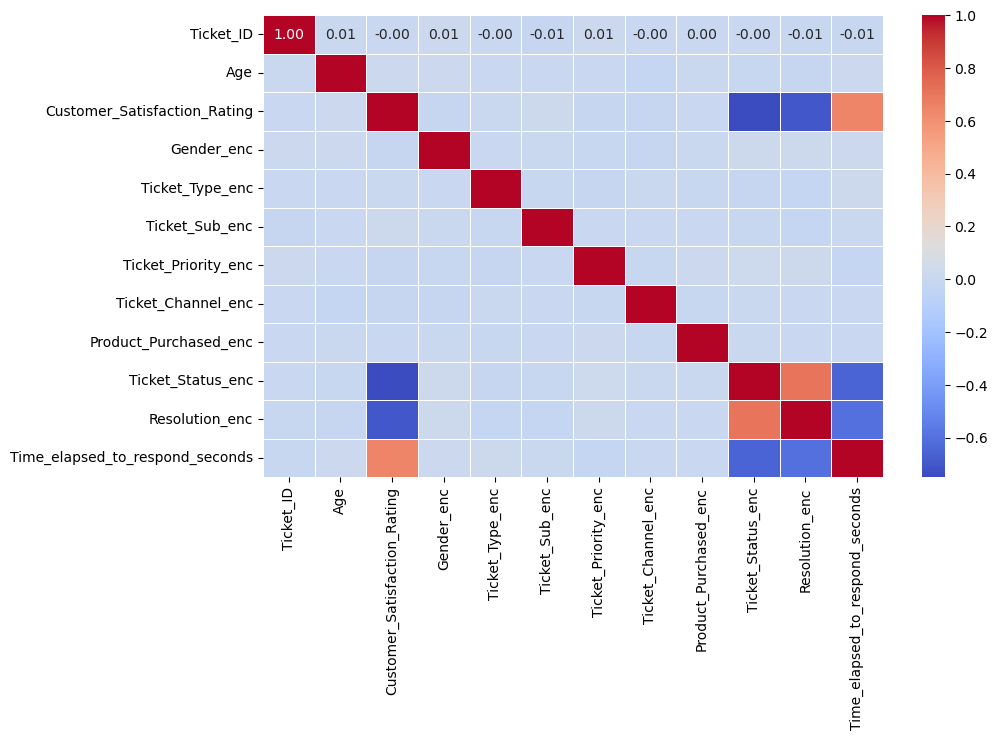

In [82]:
cor=df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)

<Axes: >

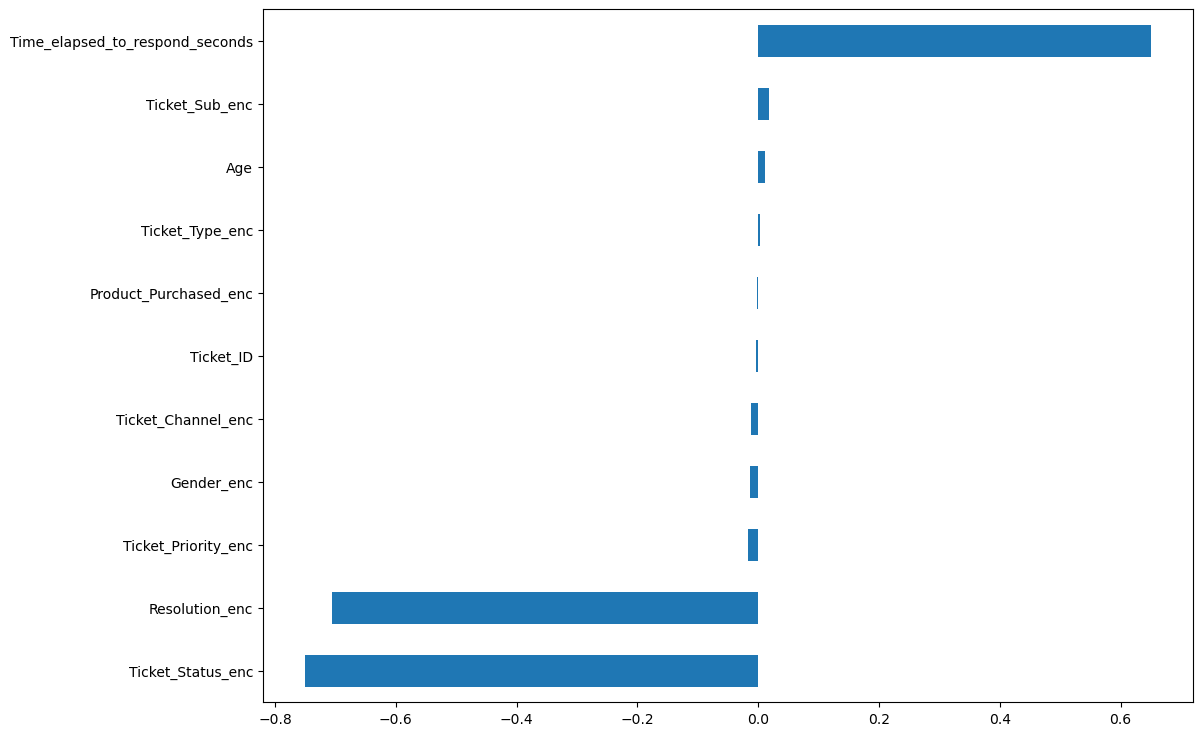

In [84]:
df_corr=df1.corr()['Customer_Satisfaction_Rating'].drop('Customer_Satisfaction_Rating')
df_corr=df_corr.sort_values()
df_corr.plot(kind='barh',figsize=(12,9))


The Time_elapsed_to_respond_seconds, Ticket priority, Ticket subject, Age, Ticket_Type are positively correlated with the customer satisfaction.  

## Model Development

### Random Forest Classifier

In [49]:
X=df1.drop(columns=['Ticket_ID','Customer_Satisfaction_Rating'])
y=df1['Customer_Satisfaction_Rating']

In [73]:
y.value_counts()

Customer_Satisfaction_Rating
0.0    5700
3.0     580
1.0     553
2.0     549
5.0     544
4.0     543
Name: count, dtype: int64

In [50]:
X_scale=StandardScaler().fit_transform(X)

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,y,test_size=0.2,random_state=42,stratify=y)

In [47]:
rf=RandomForestClassifier(class_weight='balanced')

In [48]:
param_grid={
    'n_estimators':[50,100],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5]
    
}


In [49]:
cv=StratifiedKFold(n_splits=5,shuffle=True)

In [50]:
model=GridSearchCV(estimator=rf,cv=cv,param_grid=param_grid,scoring='accuracy',verbose=2)
model.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_sam

,estimator,RandomForestC...ht='balanced')
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [51]:
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1140
         1.0       0.23      0.25      0.24       111
         2.0       0.21      0.19      0.20       110
         3.0       0.25      0.29      0.27       116
         4.0       0.18      0.19      0.18       108
         5.0       0.20      0.16      0.18       109

    accuracy                           0.74      1694
   macro avg       0.34      0.35      0.34      1694
weighted avg       0.74      0.74      0.74      1694



In [52]:
print((model.score(X_test,Y_test))*100)

74.3801652892562


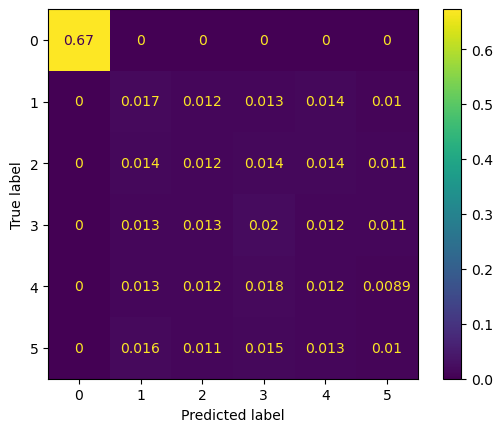

In [53]:
conf_matrix=confusion_matrix(Y_test,y_pred,normalize='all')
cmd1=ConfusionMatrixDisplay(conf_matrix)
cmd1.plot()


This is a normalized confusion matrix.  The diagonal elements are correctly predicted samples. 
class 0 classifies 67% of them correctly.  
class 1 classifies 1.7% of them correctly. The correct predictions are 119 out of 553 samples are correctly classified in class 1 i.e. 21% out of total in class 1 is classified correctly.  
class 2 classifies 1.2% of them correctly.  The correct predictions are 110 out of 549 samples are correctly classified in class 2, i.e. 20% out of total in class 2 are classified correctly.
class 3 classifies 2.0% of them correctly. The correct predictions are 169 out of 580 samples are correctly classified in class 3, i.e. 25% out of total in class 3 are classified correctly.  
class 4 classifies 1.1% of them correctly. The correct predictions are 102 out of 543 samples are correctly classified in class 4, i.e. 17% out of total in class 4 are classified correctly. 
class 5 classifies 1.8% of them correctly. The correct predictions are 85 out of 544 samples are correctly classified in class 5, i.e. 30% out of total in class 4 are classified correctly.

Out of these classes class 0, class 3, class 1 are better classified.





### Logistic Regression

In [52]:
LR_one_all=LogisticRegression(multi_class='ovr',max_iter=1000)
LR_one_all.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


In [53]:
ypred_one_all=LR_one_all.predict(X_test)
print('Accuracy score is',np.round(accuracy_score(Y_test,ypred_one_all),2)*100)

Accuracy score is 74.0


In [56]:
print(classification_report(Y_test,ypred_one_all))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1140
         1.0       0.21      0.20      0.21       111
         2.0       0.20      0.13      0.16       110
         3.0       0.23      0.33      0.27       116
         4.0       0.19      0.22      0.21       108
         5.0       0.23      0.19      0.21       109

    accuracy                           0.74      1694
   macro avg       0.34      0.34      0.34      1694
weighted avg       0.74      0.74      0.74      1694



In [54]:
y_score=LR_one_all.predict_proba(X_test)

In [55]:
print('Micro averaged One-vs-Rest ROC AUC score: ',roc_auc_score(Y_test,y_score,multi_class='ovr',average='micro'))

Micro averaged One-vs-Rest ROC AUC score:  0.9579090170321254


In [56]:
print('Macro averaged One-vs-Rest ROC AUC score: ',roc_auc_score(Y_test,y_score,multi_class='ovr',average='macro'))

Macro averaged One-vs-Rest ROC AUC score:  0.8847030649356175


Micro averaged and macro average ROC AUC score ranges from 0 t0 1. Higher the micro and macro averaged AUC ROC score greatness the correctness of classification.  Here, the micro averaged AUC ROC score is 0.958 and macro averaged AUC ROC score is 0.885 which indicates the classification is accurate.

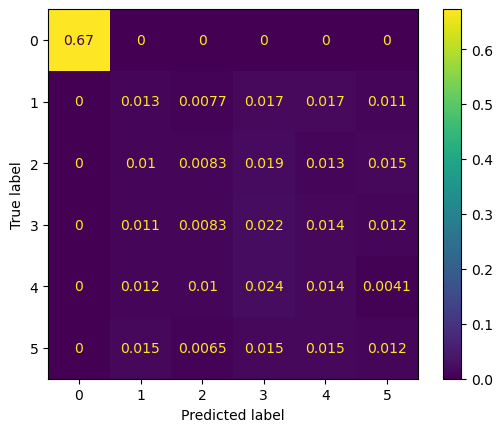

In [76]:
conf_matrix=confusion_matrix(Y_test,ypred_one_all,normalize='all')
cmd1=ConfusionMatrixDisplay(conf_matrix)
cmd1.plot()

This is a normalized confusion matrix. The diagonal elements are correctly predicted samples. 
class 0 classifies 67% of them correctly.
class 1 classifies 1.3% of them correctly. The correct predictions are 110 out of 553 samples are correctly classified in class 1 i.e. 20% out of total in class 1 is classified correctly.
class 2 classifies 0.083% of them correctly. The correct predictions are 70 out of 549 samples are correctly classified in class 2, i.e. 13% out of total in class 2 are classified correctly. 
class 3 classifies 2.2% of them correctly. The correct predictions are 186 out of 580 samples are correctly classified in class 3, i.e. 32% out of total in class 3 are classified correctly.
class 4 classifies 1.4% of them correctly. The correct predictions are 119 out of 543 samples are correctly classified in class 4, i.e. 22% out of total in class 4 are classified correctly. 
class 5 classifies 1.2% of them correctly. The correct predictions are 102 out of 544 samples are correctly classified in class 5, i.e. 19% out of total in class 5 are classified correctly.

Out of these classes class 0, class 3, class 4 are better classified. class 2 is poorly classified.

In [57]:
label_binar=LabelBinarizer().fit(Y_train)
y_onehot_test=label_binar.transform(Y_test)

In [58]:
fpr, tpr, roc_auc=dict(),dict(),dict()
fpr["micro"],tpr["micro"],_=roc_curve(y_onehot_test.ravel(),y_score.ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

In [59]:
for i in range(6):
    fpr[i],tpr[i],_=roc_curve(y_onehot_test[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
fpr_grid=np.linspace(0.0,1.0,1000)
mean_tpr=np.zeros_like(fpr_grid)
for i in range(6):
    mean_tpr+=np.interp(fpr_grid,fpr[i],tpr[i])
mean_tpr/=6

fpr["macro"]=fpr_grid
tpr["macro"]=mean_tpr
roc_auc["macro"]=auc(fpr["macro"],tpr["macro"])

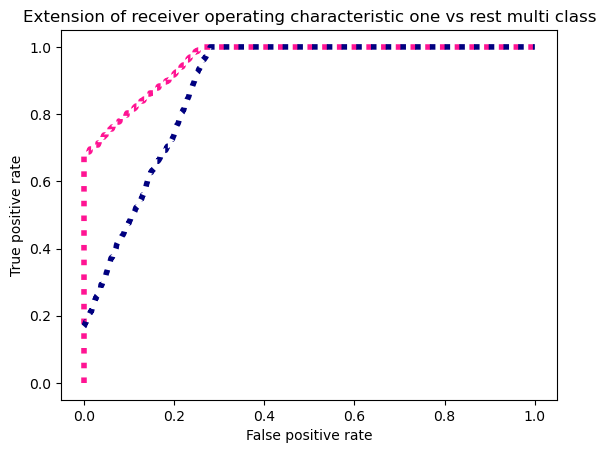

In [60]:
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve(AUC)={roc_auc['micro']}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve(AUC)={roc_auc['macro']}",
    color="navy",
    linestyle=":",
    linewidth=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Extension of receiver operating characteristic one vs rest multi class")
plt.show()

The above ROC curve is a visual representation of model performance across all thresholds. The ROC curve is almost a square which means the model always assigns a random rating of a particular class to that class itself is of higher probability than assigning it to a different class. 

## Saving the results

In [63]:
ypred_one_all_df=pd.DataFrame(ypred_one_all)
ypred_one_all_df.head()

,0
0,0.0
1,0.0
2,0.0
3,5.0
4,0.0


In [65]:
ypred_one_all_df.to_csv('D://Unified mentor internship projects//customer_satisfaction.csv')